___ EJERCICIO #1 ___
>>>ITEM 1.a & 1.b 



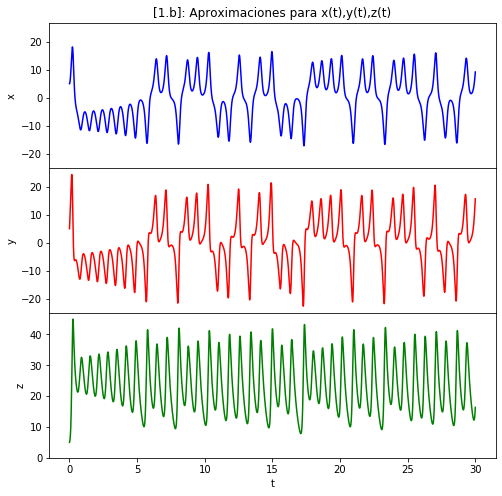

>>>ITEM 1.c 


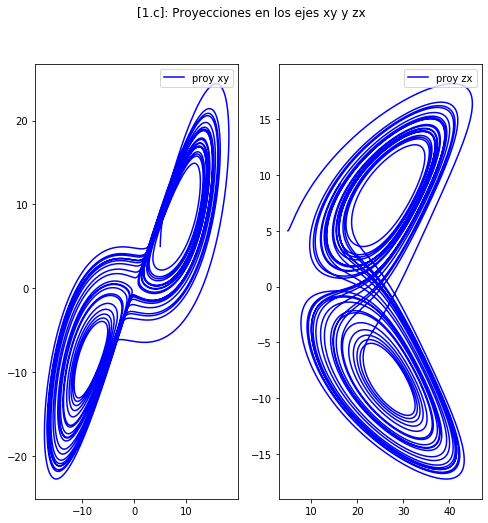

___ EJERCICIO #2 ___
>>>ITEM 2.b 

θ1(t)= [ 1.57079633  1.56957008  1.56589135 ... -0.89071188 -0.8190479
 -0.74473869]
θ2(t)= [  1.57079633   1.57079633   1.57079628 ... -24.62825423 -24.61773073
 -24.61421175]
ω1(t)= [ 0.         -0.24524971 -0.49049167 ...  7.03713744  7.29677918
  7.56778971]
ω2(t)= [ 0.00000000e+00 -4.91705126e-07 -1.42589073e-05 ...  1.38599511e+00
  7.10508915e-01 -1.53689289e-02]
>>>ITEM 2.c 



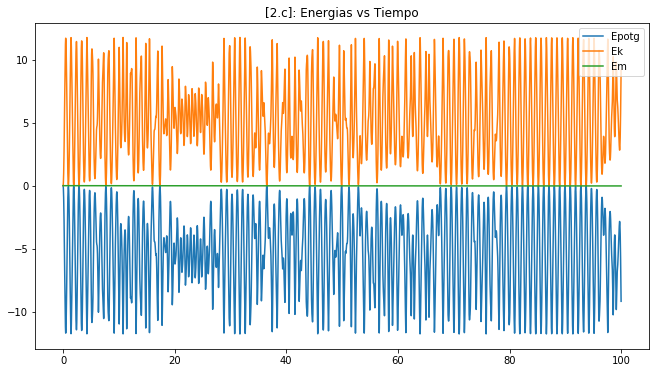

La Energía Mecánica se conserva: El péndulo solo es afectado por fuerzas conservativas
(y no existe ningún tipo de desgaste i.e. fricción)se cumple el principio de conservación de energía
___ EJERCICIO #3 ___

>>>ITEM 3.a 

[Met. Trapecio Compuesto (n= 100 )]: Cv(T=30)= 6.904323296990321

El # de intervalos no es múltiplo de 3
Se redefinio el valor de n ---> n= 99
[Met. Simpson 3/8 Compuesto ( n= 99 )]: Cv(T=30)= 6.904331864217936
>>>ITEM 3.b 


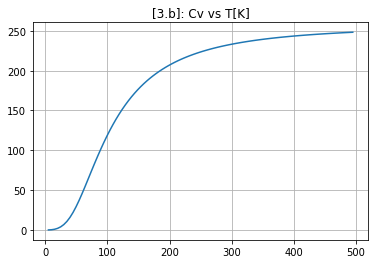

>>>ITEM 3.c 


NameError: name 'Cv' is not defined

In [7]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show

from matplotlib.pyplot import figure

from Chira_modulo import *

import warnings
warnings.filterwarnings("ignore")


####################                    ####################
############################################################
####################   EJERCICIO 1      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #1 ___")

##
##
print(">>>ITEM 1.a & 1.b ")
print("")
#Condiciones: inicial y de rango [r_a,r_b]
rt01=[5,5,5]
r_a1=0
r_b1=30

h1=0.001 #paso h=(b-a)/n   
    
    
#Sist de EDO's del problema
def fxdt(t,x,y,sigma):
    return - sigma*x + sigma*y 

def fydt(t,x,y,z,r):
    return r*x - y - x*z 

def fzdt(t,x,y,z,b):
    return - b*z + x*y 


def F1(t,r):
    
    #constantes del problema
    sigma=10
    b=2.6667
    r_cte=28
    
    F=array([fxdt(t,r[0],r[1],sigma),fydt(t,r[0],r[1],r[2],r_cte), fzdt(t,r[0],r[1],r[2],b)],float64)
    
    return F



###    METODO DE Rk4
#datos:
tsRK4,rRK4=sists_RK4(r_a1,r_b1,rt01,F1,h1) #rk4 es un vector que contiene a los vects xyz: rk4=(x,y,z)

#graficas:
f = plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.001) #espaciado entre graficass

#graf: x(t)
ax1 = plt.subplot(311)
ax1.plot(tsRK4,rRK4[0],'b')
plt.yticks(range(-20, 25, 10))
plt.title("[1.b]: Aproximaciones para x(t),y(t),z(t)")
plt.ylabel("x")

#graf: y(t)
ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
ax2.plot(tsRK4,rRK4[1],'r')
plt.ylabel("y")

#graf: z(t)
ax3 = plt.subplot(313, sharex=ax1)
ax3.plot(tsRK4,rRK4[2],'g')
plt.yticks(range(0, 45, 10))
plt.ylabel("z")

plt.xlabel("t")
plt.show()


##
print(">>>ITEM 1.c ")
#proyecciones en los ejes xy zx
fig, (bx1, bx2) = plt.subplots(1, 2,figsize=(8,8))
fig.suptitle('[1.c]: Proyecciones en los ejes xy y zx')
bx1.plot(rRK4[0],rRK4[1],'b',label="proy xy")
bx1.legend(loc="upper right")
bx2.plot(rRK4[2],rRK4[0],'b',label="proy zx")
bx2.legend(loc="upper right")
plt.show()



####################                    ####################
############################################################
####################   EJERCICIO 2      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #2 ___")

print(">>>ITEM 2.b ")
print("")
#Condiciones: inicial y de rango [r_a,r_b]
rt02=[pi/2,pi/2,0,0] # {th1,th2,w1,w2}(t=0)
r_a2=0
r_b2=100

h2=0.01 #paso  

#funciones del problema
def dw1dt(th1,th2,w1,w2,g,l):
    eq = -((w1**2)*sin(2*th1-2*th2)+2*(w2**2)*sin(th1-th2)+(g/l)*(sin(th1-2*th2)+3*sin(th1)) )
    eq = eq/(3-cos(2*th1 - 2*th2))
    return eq

def dw2dt(th1,th2,w1,w2,g,l):
    eq = 4*(w1**2)*sin(th1-th2) + (w2**2)*sin(2*th1-2*th2)+2*(g/l)*(sin(2*th1-th2)-sin(th2))
    eq = eq/(3-cos(2*th1-2*th2))
    return eq


#Vector F del problema
def F2(t,r):
    #En este caso r sera [th1,th2,w1,w2]
    g=9.81
    l=0.4
    F=array([r[2],r[3],dw1dt(r[0],r[1],r[2],r[3],g,l),dw2dt(r[0],r[1],r[2],r[3],g,l)],float64)    
    return F

###    METODO DE Rk4
#datos:
tRK4,thRK4=sists_RK4(r_a2,r_b2,rt02,F2,h2)#rk4 es un vector que contiene a los vects xyz: rk4=(x,y,z)

print("\u03B81(t)=",thRK4[0])
print("\u03B82(t)=",thRK4[1])
print("\u03C91(t)=",thRK4[2])
print("\u03C92(t)=",thRK4[3])



print(">>>ITEM 2.c ")
print("")
m=1
g=9.81
l=0.4
E_pot=Epot(thRK4,m,g,l)
E_k=Ek(thRK4,m,g,l)
E_m=Em(E_k,E_pot)


f = plt.figure(figsize=(11, 6))
plt.plot(tRK4,E_pot,label="Epotg")
plt.plot(tRK4,E_k,label="Ek")
plt.plot(tRK4,E_m,label="Em")
plt.title('[2.c]: Energias vs Tiempo')
plt.legend()
plt.show()

print("La Energía Mecánica se conserva: El péndulo solo es afectado por fuerzas conservativas")
print("(y no existe ningún tipo de desgaste i.e. fricción)se cumple el principio de conservación de energía")


####################                    ####################
############################################################
####################   EJERCICIO 3      ####################
############################################################
####################                    ####################
print("___ EJERCICIO #3 ___")
print("")
print(">>>ITEM 3.a ")
print("")

#Constantes ejercicio 3
V=10**(-4)
rho=6.22*(10**28)
tD= 428 #en Kelvin
kb=1.3806488*(10**(-23))

#funciones ej 3
def func_ej3(v,rho,kb,T,tD,Iapp):
    return 9*v*kb*rho*((T/tD)**3)*Iapp

def func_int(x):
    return ((x**4)*exp(x))/ (exp(x) - 1)**2

###
'''
    EJERCICIO 3(a)
'''
###

T=30 #dato

#obteniendo el valor de la funcion integrada
lim_inf = 0.00001 #para evitar la indeterminacion
lim_sup = tD/T
n = 100 #nro intervalos

##Metodo Trapecio
I_tcomp = trap_comp(lim_inf,lim_sup,func_int,n)
Cv_trapcomp =  func_ej3(V,rho,kb,T,tD,I_tcomp) 
print("[Met. Trapecio Compuesto (n=",str(n),")]: Cv(T=30)=",Cv_trapcomp)
print("")

I_38comp, n_38 =simp38_comp(lim_inf,lim_sup,func_int,n)
Cv_38comp = func_ej3(V,rho,kb,T,tD,I_38comp) 
print("[Met. Simpson 3/8 Compuesto ( n=",str(n_38),")]: Cv(T=30)=",Cv_38comp)


###
'''
    EJERCICIO 3(b)
'''
###
print(">>>ITEM 3.b ")
#creando el rango de temperaturas (con n puntos)
h=(500-5)/n #paso para generar 100 puntos de Temps
Temps=array(arange(5,500,h))

Cvs = [] #lista para los valores de Cv

for i in range(n):
    t=Temps[i]
    lim_sup=tD/t
    I_temp = trap_comp(lim_inf,lim_sup,func_int,n)
    Cv_temp= func_ej3(V,rho,kb,t,tD,I_temp) 
    Cvs.append(Cv_temp)
    
plt.plot(Temps,Cvs)
plt.title("[3.b]: Cv vs T[K]")
plt.grid()
plt.show()

print(">>>ITEM 3.c ")
###
'''
    EJERCICIO 3(b)
'''
###
print("Dato encontrados para T=5K  Cv=",Cvs[0])
print("Observaremos que la tendencia al llegar a T=0k será cada vez más cercana a Cv=0")
print("Lo cual se comprueba al utilizar el límite T-->0 en la función del problema")
print("Esto también es consecuente con el hecho que al estar  el sólido a una baja temperatura")
print("será más dificil cambiar este estado <> Capacida calorifica muy baja")

print("")
print("FIN")